# Tree Ensembles: Practical Demonstration (Boosting)


This Notebook contains the code used in the Medium Article called [Tree Ensembles: Theory and Practice](https://www.google.es) for the Boosting Practical Demonstration

In [1]:
import random
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

from synthetic_data import create_data

RANDOM_SEED = 42
NUMBER_OF_TREES = 5

## Synthetic Dataset

A small synthetic dataset is created in order to easily show how boosting works. For this notebook, a categorical feature is going to be predicted

In [2]:
dataframe = create_data(categorical=True)
display(dataframe)

,square_meters,has_garage,has_garden,rooms,price
0,100,True,False,2,MEDIUM
1,50,False,False,1,LOW
2,75,False,True,2,LOW
3,120,True,False,3,LOW
4,230,True,True,4,HIGH
5,175,False,False,3,HIGH
6,80,False,False,3,MEDIUM
7,90,True,False,3,LOW
8,350,False,True,6,HIGH
9,275,True,True,4,MEDIUM


## Boosting

,square_meters,has_garage,has_garden,rooms,price
0,100,True,False,2,MEDIUM
1,50,False,False,1,LOW
2,75,False,True,2,LOW
3,120,True,False,3,LOW
4,230,True,True,4,HIGH
5,175,False,False,3,HIGH
6,80,False,False,3,MEDIUM
7,90,True,False,3,LOW
8,350,False,True,6,HIGH
9,275,True,True,4,MEDIUM


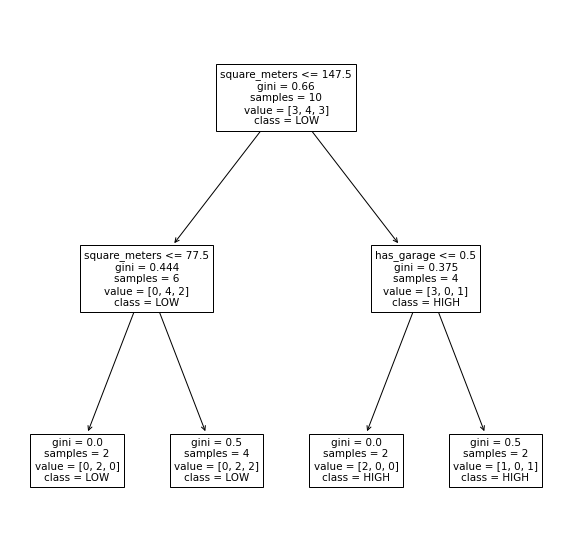

Tree 0 has an accuracy of 70.0
Tree 0 have the following missclassified indexes [0, 6, 9]


,square_meters,has_garage,has_garden,rooms,price
0,100,True,False,2,MEDIUM
1,50,False,False,1,LOW
2,75,False,True,2,LOW
3,120,True,False,3,LOW
4,230,True,True,4,HIGH
5,175,False,False,3,HIGH
6,80,False,False,3,MEDIUM
7,90,True,False,3,LOW
8,350,False,True,6,HIGH
9,275,True,True,4,MEDIUM


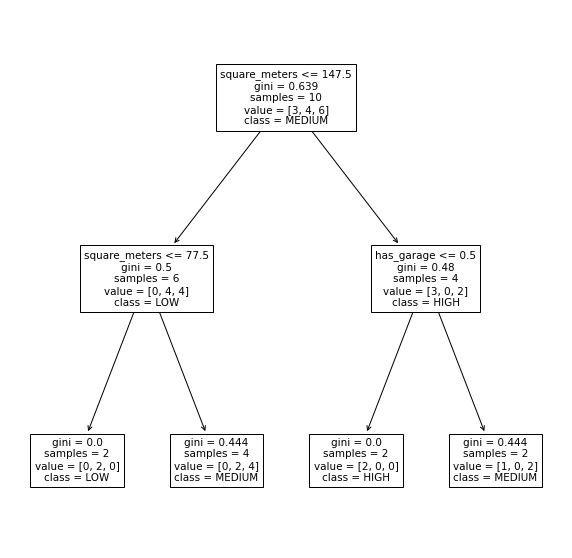

Tree 1 has an accuracy of 70.0
Tree 1 have the following missclassified indexes [3, 4, 7]


,square_meters,has_garage,has_garden,rooms,price
0,100,True,False,2,MEDIUM
1,50,False,False,1,LOW
2,75,False,True,2,LOW
3,120,True,False,3,LOW
4,230,True,True,4,HIGH
5,175,False,False,3,HIGH
6,80,False,False,3,MEDIUM
7,90,True,False,3,LOW
8,350,False,True,6,HIGH
9,275,True,True,4,MEDIUM


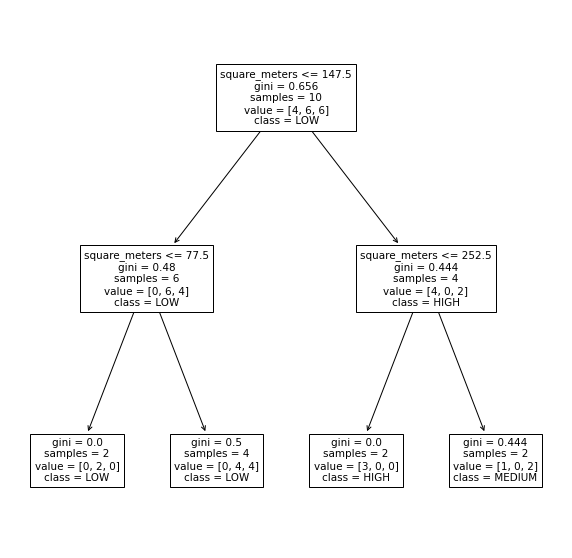

Tree 2 has an accuracy of 70.0
Tree 2 have the following missclassified indexes [0, 6, 8]


,square_meters,has_garage,has_garden,rooms,price
0,100,True,False,2,MEDIUM
1,50,False,False,1,LOW
2,75,False,True,2,LOW
3,120,True,False,3,LOW
4,230,True,True,4,HIGH
5,175,False,False,3,HIGH
6,80,False,False,3,MEDIUM
7,90,True,False,3,LOW
8,350,False,True,6,HIGH
9,275,True,True,4,MEDIUM


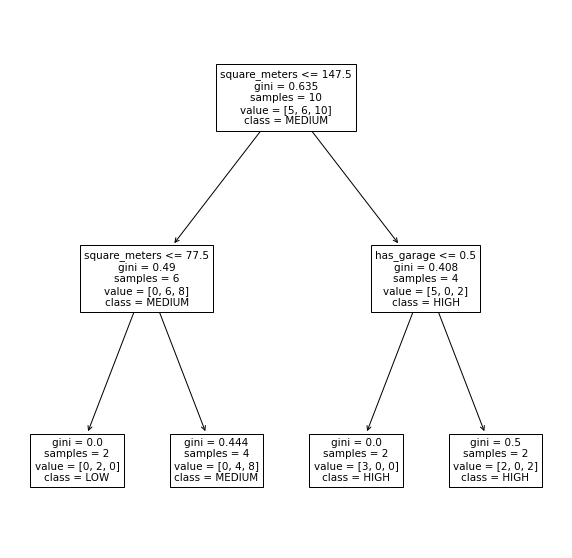

Tree 3 has an accuracy of 70.0
Tree 3 have the following missclassified indexes [3, 7, 9]


,square_meters,has_garage,has_garden,rooms,price
0,100,True,False,2,MEDIUM
1,50,False,False,1,LOW
2,75,False,True,2,LOW
3,120,True,False,3,LOW
4,230,True,True,4,HIGH
5,175,False,False,3,HIGH
6,80,False,False,3,MEDIUM
7,90,True,False,3,LOW
8,350,False,True,6,HIGH
9,275,True,True,4,MEDIUM


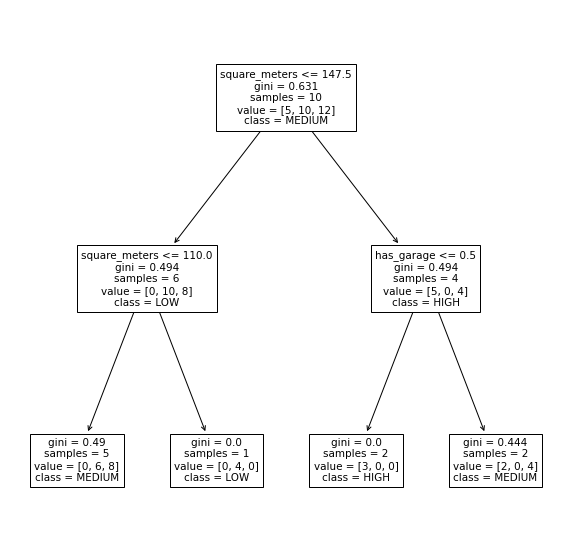

Tree 4 has an accuracy of 60.0
Tree 4 have the following missclassified indexes [1, 2, 4, 7]


In [3]:
# Define the features to use by the tree and the output to predict (target)
features = ["square_meters", "has_garage", "has_garden", "rooms"]
output = "price"

# Objects to save the results while iterating over the different trees
dataframe_with_results = dataframe.copy()
accuracy_results = {}

# 
dataframe_x = dataframe[features]
dataframe_y = dataframe[output]
weights = []

# 10 weights array (one for each observation) that contains only ones
weights = np.ones(shape=10)

for i in range(0, NUMBER_OF_TREES):
    # Training the model
    dtc = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=2)
    
    # If one tree has been trained, then the weights are updated in order to double the importance of the misclassified instances
    if i != 0:
        for index in misclassified_indexes:
            weights[index] = weights[index] * 2
    
    # The tree is trained with the specific weights
    dtc.fit(dataframe_x, dataframe_y, sample_weight=weights)
    predictions = dtc.predict(dataframe_x)
    
    # Display the dataframe
    display(dataframe)
    
    # Plot the tree
    plt.figure(figsize=(10, 10))
    tree.plot_tree(dtc, feature_names=features, class_names=sorted(dataframe_y.unique()))
    plt.show()
    
    # Save the prediction of the tree
    tree_name = f"tree_{i}"
    dataframe_with_results[tree_name] = predictions
    
    # Save the accuracy of the tree
    accuracy = (dataframe_with_results[tree_name] == dataframe_with_results["price"]).mean() * 100
    accuracy_results[tree_name] = accuracy
    print(f"Tree {i} has an accuracy of {accuracy}")
    
    # Obtain the misclassified observations in order to double its importances in the weights of the next tree
    misclassified_indexes = [x for x in dataframe_y.index if predictions[x]!=dataframe_y[x]]
    print(f"Tree {i} have the following missclassified indexes {misclassified_indexes}")
    
# Once every tree is trained, a boosting prediction is made using the most common prediction of all the trees    
tree_columns = dataframe_with_results.columns[dataframe_with_results.columns.str.contains("tree")]
dataframe_with_results["boosting"] = dataframe_with_results[tree_columns].mode(axis=1)

# Boosting accuracy is also saved
accuracy_results["boosting"] = (dataframe_with_results["boosting"] == dataframe_with_results["price"]).mean() * 100

In [4]:
# Results of every tree
dataframe_with_results

,square_meters,has_garage,has_garden,rooms,price,tree_0,tree_1,tree_2,tree_3,tree_4,boosting
0,100,True,False,2,MEDIUM,LOW,MEDIUM,LOW,MEDIUM,MEDIUM,MEDIUM
1,50,False,False,1,LOW,LOW,LOW,LOW,LOW,MEDIUM,LOW
2,75,False,True,2,LOW,LOW,LOW,LOW,LOW,MEDIUM,LOW
3,120,True,False,3,LOW,LOW,MEDIUM,LOW,MEDIUM,LOW,LOW
4,230,True,True,4,HIGH,HIGH,MEDIUM,HIGH,HIGH,MEDIUM,HIGH
5,175,False,False,3,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH
6,80,False,False,3,MEDIUM,LOW,MEDIUM,LOW,MEDIUM,MEDIUM,MEDIUM
7,90,True,False,3,LOW,LOW,MEDIUM,LOW,MEDIUM,MEDIUM,MEDIUM
8,350,False,True,6,HIGH,HIGH,HIGH,MEDIUM,HIGH,HIGH,HIGH
9,275,True,True,4,MEDIUM,HIGH,MEDIUM,MEDIUM,HIGH,MEDIUM,MEDIUM


In [5]:
# Showing the accuracy results
pd.DataFrame(accuracy_results, index=[0]).T.reset_index().rename({"index": "Learner", 0: "Accuracy"}, axis="columns")

,Learner,Accuracy
0,tree_0,70.0
1,tree_1,70.0
2,tree_2,70.0
3,tree_3,70.0
4,tree_4,60.0
5,boosting,90.0
